## Análise de Dados Titanic

### Dicionário de Dados Tabela Titanic

- **PassagerId**: Id do passageiro
- **Survived**: sobreviveu (0 = não, 1 = sim)
- **Pclass**: Classe do passageiro (1 = primeira, 2 = segunda, 3 = terceira)
- **Name**: Nome do passageiro
- **Sex**: Sexo do passageiro
- **Age**: Idade do Passageiro
- **Sib Sp**: Número de irmãos/esposa(o) a bordo com o passageiro
- **Parch**: Número de pais/filhos a bordo com o passageiro
- **Ticket**: Número da passagem
- **Fare**: Preço da passagem
- **Cabin**: cabine
- **Embarked**: Local em que o passageiro embarcou:
    - *C* = Cherbourg
    - *Q* = Queenstown
    - *S* = Southampton


## Tratamento dos Dados

Aqui abrimos o arquivo de dados com o read para expor os primeiros 10 registros usando o head(10)

In [ ]:
import pandas as pd # fazendo a importação da biblioteca pandas usada para manipulação de dados 

titanic_df = pd.read_csv("titanic.csv") # read lê o arquivo csv e armazenando na variável titanic_df

titanic_df.head(10) # exibe as 10 primeiras linhas do DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Aqui descobrimos os tipos de variaveis que estão contidos no conjunto de dados usando types

In [ ]:
titanic_df.dtypes # dtypes exibe os tipos de dados de cada coluna do DataFrame

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Aqui vemos a contagem de linhas e colunas

In [ ]:
titanic_df.shape # shape exibe a quantidade de linhas e colunas do DataFrame

(891, 12)

verifica o total e a proporção de nulos no DataFrame

In [ ]:
titanic_df.isnull() # isnull verifica valores nulos no DataFrame
titanic_df.isnull().sum()/len(titanic_df) # sun soma a quantidade de valores nulos por coluna e divide pelo total de linhas do DataFrame 

pd.DataFrame(zip(titanic_df.isnull().sum(),titanic_df.isnull().sum()/len(titanic_df)), columns=['Count', 'Proportion'], index=titanic_df.columns) # zip combina os dois resultados em um único DataFrame com colunas 'Count' e 'Proportion', onde 'Count' é a contagem de valores nulos e 'Proportion' é a proporção de valores nulos em relação ao total de linhas do DataFrame.

,Count,Proportion
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


## Análise Descritiva dos Dados

In [ ]:
titanic_df.describe().iloc[:, [0,1]] # describe() gera estatísticas descritivas do DataFrame, como contagem, média, desvio padrão, valores mínimos e máximos, e quartis. iloc[:, [0,1]] seleciona todas as linhas (:) e apenas as colunas de índice 0 e 1 (neste caso, 'PassengerId' e 'Survived').

,PassengerId,Survived
count,891.000000,891.000000
mean,446.000000,0.383838
std,257.353842,0.486592
min,1.000000,0.000000
25%,223.500000,0.000000
50%,446.000000,0.000000
75%,668.500000,1.000000
max,891.000000,1.000000


***Análise***

**count (contagem)**: O valor é 891.000000. Isso significa que a análise foi feita com os dados de 891 passageiros.

**mean (média)**: O valor é 0.383838. Como o Survived usa 0 para não-sobreviventes e 1 para sobreviventes, a média de 0.383838 significa que aproximadamente 38.4% dos passageiros do conjunto de dados sobreviveram.

**std (desvio padrão)**: O valor é 0.486592. Isso indica o quão espalhados estão os valores de sobrevivência em relação à média. Um valor próximo de 0.5 é comum para dados binários como este.

**min (mínimo)**: O valor é 0.000000. Isso confirma que a categoria "não sobreviveu" está presente nos dados.

**25% (primeiro quartil)**: O valor é 0.000000. Isso significa que 25% dos passageiros não sobreviveram.

**50% (mediana)**: O valor é 0.000000. Metade dos dados (50%) está abaixo desse valor. Neste caso, indica que mais da metade dos passageiros não sobreviveu.

**75% (terceiro quartil)**: O valor é 1.000000. Isso significa que 75% dos passageiros estão na categoria "não sobreviveu" ou "sobreviveu". Como o valor é 1, indica que a sobrevivência começa a ser mais comum a partir deste ponto, mas a maioria ainda está na categoria 0.

**max (máximo)**: O valor é 1.000000. Isso confirma que a categoria "sobreviveu" está presente nos dados.

In [ ]:
titanic_df.describe().round(2).T # round(2) arredonda os valores para 2 casas decimais e T transpõe o DataFrame para facilitar a leitura.

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.00,257.35,1.00,223.50,446.00,668.5,891.00
Survived,891.0,0.38,0.49,0.00,0.00,0.00,1.0,1.00
Pclass,891.0,2.31,0.84,1.00,2.00,3.00,3.0,3.00
Age,714.0,29.70,14.53,0.42,20.12,28.00,38.0,80.00
SibSp,891.0,0.52,1.10,0.00,0.00,0.00,1.0,8.00
Parch,891.0,0.38,0.81,0.00,0.00,0.00,0.0,6.00
Fare,891.0,32.20,49.69,0.00,7.91,14.45,31.0,512.33


A média de sobrevivência atual é de 0.38. Isso indica que aproximadamente 38% dos passageiros na amostra sobreviveram.

O desvio padrão é de 0.49.

O mínimo é de 0.00, confirmando que há passageiros que não sobreviveram (representados pelo valor 0).

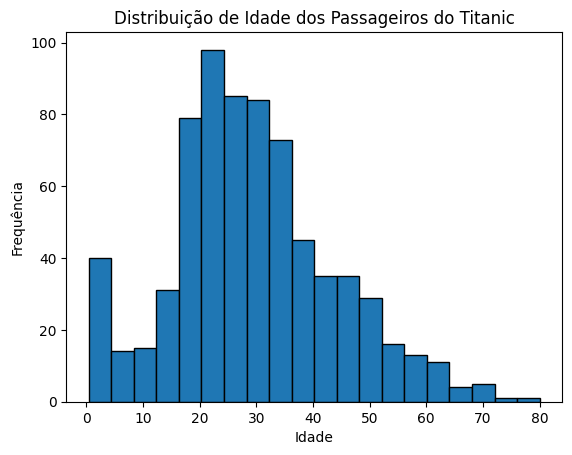

In [ ]:
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib para visualização de dados

plt.hist(titanic_df['Age'].dropna(), bins=20, edgecolor='black') # Cria um histograma da coluna 'Age', removendo valores nulos com dropna(), definindo 20 bins que são as barras do histograma, e adicionando bordas pretas às barras para melhor visualização

plt.title('Distribuição de Idade dos Passageiros do Titanic') # Adiciona um título ao gráfico
plt.xlabel('Idade') # Adiciona um rótulo ao eixo x
plt.ylabel('Frequência') # Adiciona um rótulo ao eixo y

plt.show() # Exibe o gráfico gerado

O histograma matplotlib mostra a distribuição de idade dos passageiros de forma clara.

Eixo X (horizontal): Representa a idade dos passageiros. Cada barra agrupa passageiros dentro de uma faixa de idade específica (ex: 0-10 anos, 10-20 anos, etc.).

Eixo Y (vertical): Mostra a frequência, ou seja, a quantidade de passageiros que se enquadram em cada faixa de idade.

Análise: Ao olhar para este gráfico, você consegue ver rapidamente que a maioria dos passageiros está na faixa dos 20 e 30 anos, indicando que a população a bordo era predominantemente de adultos jovens.

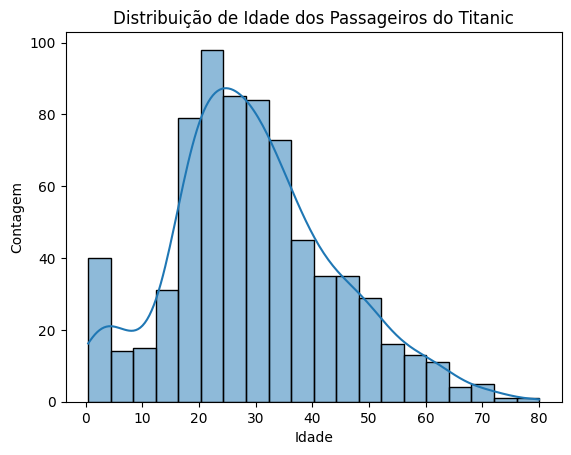

In [ ]:
import seaborn as sns # Importa a biblioteca seaborn para visualização de dados
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib para visualização de dados

sns.histplot(data=titanic_df, x='Age', bins=20, kde=True) # histplot cria um histograma da coluna 'Age' do DataFrame titanic_df, com 20 bins (barras) e adiciona uma linha de densidade (kde=True) para mostrar a distribuição dos dados

plt.title('Distribuição de Idade dos Passageiros do Titanic') # Adiciona um título ao gráfico
plt.xlabel('Idade') # Adiciona um rótulo ao eixo x
plt.ylabel('Contagem') # Adiciona um rótulo ao eixo y

plt.show() # Exibe o gráfico gerado

O histograma seaborn oferece a mesma informação, mas com um bônus visual: a linha de densidade de kernel (KDE).

Barras: Funcionam exatamente como no matplotlib, mostrando a contagem de passageiros por faixa de idade.

Linha KDE (curva suave): Essa linha extra suaviza a distribuição dos dados e ajuda a identificar os picos. Ela mostra a probabilidade de um passageiro ter determinada idade.

Análise: Com a linha KDE, fica ainda mais fácil perceber que a maior concentração de passageiros está na faixa dos 20-30 anos. A linha também destaca que há um pico secundário em torno de 1 ano de idade (bebês), o que pode ser um ponto interessante para análises futuras. A cauda da distribuição à direita, com poucas ocorrências, mostra que havia menos passageiros mais velhos a bordo.

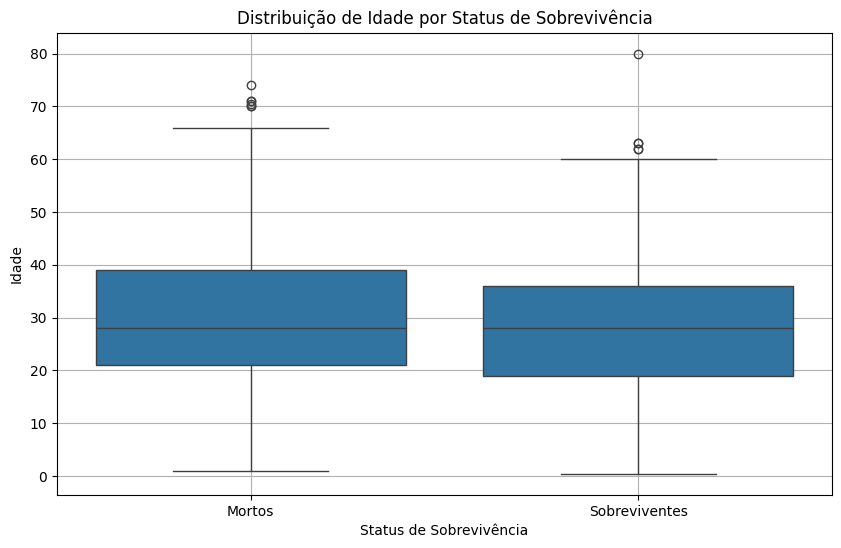

In [ ]:
import matplotlib.pyplot as plt # Importa a biblioteca matplotlib para visualização de dados

plt.figure(figsize=(10, 6)) # Define o tamanho da figura do gráfico
sns.boxplot(x='Survived', y='Age', data=titanic_df) # boxplot cria um gráfico de caixa para a coluna 'Age', agrupando os dados pela coluna 'Survived' do DataFrame titanic_df
plt.title('Distribuição de Idade por Status de Sobrevivência') # Adiciona um título ao gráfico
plt.xticks(ticks=[0, 1], labels=['Mortos', 'Sobreviventes']) # Define os rótulos do eixo x para os valores 0 e 1 da coluna 'Survived'
plt.xlabel('Status de Sobrevivência') # Adiciona um rótulo ao eixo x
plt.ylabel('Idade') # Adiciona um rótulo ao eixo y
plt.grid(True) # Adiciona uma grade ao gráfico para melhor visualização
plt.show() # Exibe o gráfico gerado

C:\Users\sammy\AppData\Local\Temp\ipykernel_17904\1049709775.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


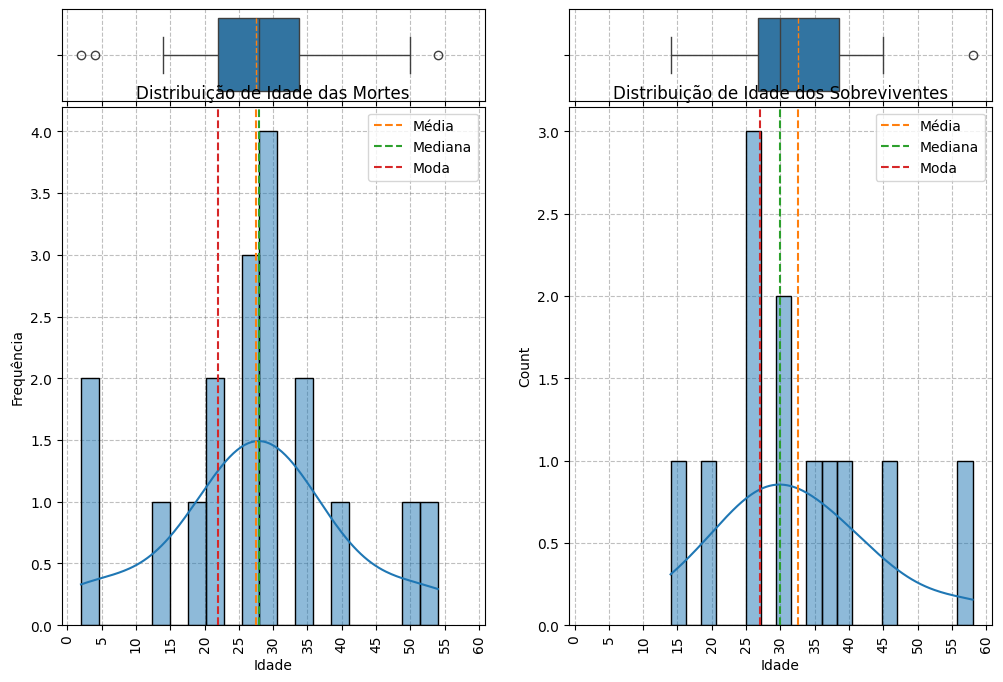

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True) # fillna preenche os valores nulos na coluna 'Age' com a mediana da coluna 'Age'. inplace=True modifica o DataFrame original

df_mortos = titanic_df[titanic_df['Survived'] == 0].copy() # Cria um novo DataFrame apenas com os passageiros que não sobreviveram (Survived == 0)
df_sobreviventes = titanic_df[titanic_df['Survived'] == 1].copy() # Cria um novo DataFrame apenas com os passageiros que sobreviveram (Survived == 1)

fig, (ax1, ax2) = plt.subplots( # Cria uma figura com dois conjuntos de eixos (ax1 e ax2)
    nrows=2, # Define o número de linhas na figura
    ncols=2, # Define o número de colunas na figura
    sharex=True, # Compartilha o eixo x entre os subplots
    gridspec_kw={"height_ratios": (0.15, 0.85), "hspace": 0.02}, # Define as proporções de altura e o espaço entre os subplots 
    figsize=(12, 8) # Define o tamanho da figura
) 

# --- Gráficos para os Mortos (coluna da esquerda) ---
sns.boxplot(x="Age", data=df_mortos, ax=ax1[0], showmeans=True, meanline=True, # boxplot cria um gráfico de caixa para a coluna 'Age' do DataFrame df_mortos, que contém apenas os passageiros que não sobreviveram
            meanprops={"color": "C1", "linestyle": "--", "linewidth": 1}) # meanprops define as propriedades da linha que representa a média no boxplot

# Histograma da Idade para os Mortos
sns.histplot(x="Age", data=df_mortos, bins=20, kde=True, ax=ax2[0]) # histplot cria um histograma da coluna 'Age' do DataFrame df_mortos, com 20 bins (barras) e adiciona uma linha de densidade (kde=True) para mostrar a distribuição dos dados

# --- Gráficos para os Sobreviventes (coluna da direita) ---
sns.boxplot(x="Age", data=df_sobreviventes, ax=ax1[1], showmeans=True, meanline=True,# boxplot cria um gráfico de caixa para a coluna 'Age' do DataFrame df_sobreviventes, que contém apenas os passageiros que sobreviveram
            meanprops={"color": "C1", "linestyle": "--", "linewidth": 1}) # meanprops define as propriedades da linha que representa a média no boxplot

# Histograma da Idade para os Sobreviventes
sns.histplot(x="Age", data=df_sobreviventes, bins=20, kde=True, ax=ax2[1]) # histplot cria um histograma da coluna 'Age' do DataFrame df_sobreviventes, com 20 bins (barras) e adiciona uma linha de densidade (kde=True) para mostrar a distribuição dos dados

ax2[0].xaxis.set_major_locator(mtick.MultipleLocator(base=5.0)) # Define o intervalo dos marcadores principais no eixo x para o histograma dos mortos
ax2[1].xaxis.set_major_locator(mtick.MultipleLocator(base=5.0))# Define o intervalo dos marcadores principais no eixo x para o histograma dos sobreviventes
ax2[0].tick_params(axis="x", rotation=90)# Rotaciona os rótulos do eixo x em 90 graus para melhor visualização no histograma dos mortos
ax2[1].tick_params(axis="x", rotation=90) # Rotaciona os rótulos do eixo x em 90 graus para melhor visualização no histograma dos sobreviventes

ax2[0].set_title("Distribuição de Idade das Mortes") # set_title define o título do histograma dos mortos
ax2[1].set_title("Distribuição de Idade dos Sobreviventes") # set_title define o título do histograma dos sobreviventes
ax2[0].set_xlabel("Idade") # set_xlabel define o rótulo do eixo x para o histograma dos mortos
ax2[1].set_xlabel("Idade") # set_xlabel define o rótulo do eixo x para o histograma dos sobreviventes
ax2[0].set_ylabel("Frequência") # set_ylabel define o rótulo do eixo y para o histograma dos mortos
ax1[0].set_xlabel("") # set_xlabel define o rótulo do eixo x para o boxplot dos mortos
ax1[1].set_xlabel("") # set_xlabel define o rótulo do eixo x para o boxplot dos sobreviventes

for ax_row in (ax1, ax2):# ax_row itera sobre as linhas de eixos (ax1 e ax2)
    for ax in ax_row: # ax itera sobre cada eixo individual em ax_row
        ax.grid(True, linestyle="--", color="gray", alpha=0.5) # Adiciona uma grade a cada gráfico com linhas tracejadas, cor cinza e transparência de 50%
        ax.set_axisbelow(True) # Garante que a grade fique atrás dos elementos do gráfico

# Adiciona as linhas de Média, Mediana e Moda para ambos os gráficos
# Mortos
age_mean_mortos = df_mortos['Age'].mean() # age_mean_mortos calcula a média da coluna 'Age' do DataFrame df_mortos
age_median_mortos = df_mortos['Age'].median()# age_median_mortos calcula a mediana da coluna 'Age' do DataFrame df_mortos
age_mode_mortos = df_mortos['Age'].mode()[0] # age_mode_mortos calcula a moda da coluna 'Age' do DataFrame df_mortos
ax2[0].axvline(age_mean_mortos, color="C1", linestyle="--", label="Média") # axvline adiciona uma linha vertical no histograma dos mortos na posição da média, com cor "C1", estilo tracejado e rótulo "Média"
ax2[0].axvline(age_median_mortos, color="C2", linestyle="--", label="Mediana") # axvline adiciona uma linha vertical no histograma dos mortos na posição da mediana, com cor "C2", estilo tracejado e rótulo "Mediana"
ax2[0].axvline(age_mode_mortos, color="C3", linestyle="--", label="Moda") # axvline adiciona uma linha vertical no histograma dos mortos na posição da moda, com cor "C3", estilo tracejado e rótulo "Moda"
ax2[0].legend() # legend exibe a legenda no histograma dos mortos

# Sobreviventes
age_mean_sobreviventes = df_sobreviventes['Age'].mean() # age_mean_sobreviventes calcula a média da coluna 'Age' do DataFrame df_sobreviventes 
age_median_sobreviventes = df_sobreviventes['Age'].median() # age_median_sobreviventes calcula a mediana da coluna 'Age' do DataFrame df_sobreviventes
age_mode_sobreviventes = df_sobreviventes['Age'].mode()[0] # age_mode_sobreviventes calcula a moda da coluna 'Age' do DataFrame df_sobreviventes
ax2[1].axvline(age_mean_sobreviventes, color="C1", linestyle="--", label="Média") # axvline adiciona uma linha vertical no histograma dos sobreviventes na posição da média, com cor "C1", estilo tracejado e rótulo "Média"
ax2[1].axvline(age_median_sobreviventes, color="C2", linestyle="--", label="Mediana") # axvline adiciona uma linha vertical no histograma dos sobreviventes na posição da mediana, com cor "C2", estilo tracejado e rótulo "Mediana"
ax2[1].axvline(age_mode_sobreviventes, color="C3", linestyle="--", label="Moda") # axvline adiciona uma linha vertical no histograma dos sobreviventes na posição da moda, com cor "C3", estilo tracejado e rótulo "Moda"
ax2[1].legend() # legend exibe a legenda no histograma dos sobreviventes

plt.show()# Exibe o gráfico gerado

 **Análise da Distribuição de Idade (Mortos vs. Sobreviventes)**
    
1. **Distribuição de Idade dos Mortos (Survived = 0)**

- Picos do Histograma (Moda): A análise do histograma de mortes provavelmente mostraria um pico alto de frequência para homens adultos jovens, na faixa dos 20-30 anos. Essa é a idade que mais aparece, a moda.

- Linha de Mediana: A linha central no boxplot (a mediana) indicaria a idade do passageiro que está no meio do grupo dos mortos. É provável que essa mediana seja um pouco mais baixa do que a mediana dos sobreviventes, sugerindo que, em geral, as vítimas eram mais jovens.

- Linha de Média: A média de idade dos mortos pode ser um pouco maior que a mediana devido à presença de outliers (pessoas muito mais velhas) que morreram no naufrágio.

- Linha de Densidade (Curva Azul): A curva azul, que suaviza o histograma, revelaria que a maior concentração de mortes ocorreu na faixa de idade adulta jovem, diminuindo gradualmente para idades mais avançadas.

2. **Distribuição de Idade dos Sobreviventes (Survived = 1)**

- Picos do Histograma (Moda): O histograma de sobreviventes provavelmente teria um ou mais picos, mostrando as idades mais comuns para aqueles que sobreviveram. As idades em torno da moda provavelmente estarão na faixa dos 20-40 anos.

- Linha de Mediana: A mediana dos sobreviventes tenderia a ser maior que a dos mortos, indicando que pessoas um pouco mais velhas (mulheres e crianças) tiveram uma taxa de sobrevivência maior.

- Linha de Média: A média pode ser um pouco menor que a mediana, caso haja uma alta concentração de crianças que sobreviveram, puxando a média para baixo.

**Conclusão Comparativa**

O boxplot e o histograma lado a lado são essenciais para esta análise. Eles permitiriam ver visualmente se a idade foi um fator decisivo. A diferença na posição das caixas e nas linhas de média e mediana entre os dois grupos indicaria claramente que a idade teve um papel na sobrevivência. Por exemplo, a alta taxa de sobrevivência entre crianças (abaixo de 10 anos) e a prioridade dada a mulheres e crianças provavelmente resultaria em uma distribuição de idade dos sobreviventes significativamente diferente da distribuição de idade das vítimas.

Análise do Gráfico

O gráfico agora mostra a Distribuição de Idade das Mortes (esquerda) e a Distribuição de Idade dos Sobreviventes (direita), permitindo uma comparação visual instantânea.

Análise das Linhas e Curvas
Linha Laranja (--): Média

A média é a soma de todas as idades dividida pelo número total de pessoas. É o "valor normal" de um conjunto de dados, mas é sensível a valores extremos. No gráfico de mortes, a média estará mais próxima das idades onde a maioria das pessoas morreu.

Linha Verde (--): Mediana

A mediana é o valor do meio. Se você alinhasse todas as idades em ordem crescente, a mediana seria a idade da pessoa que está exatamente no centro. É uma medida mais robusta que a média, pois não é afetada por idades muito atípicas.

Linha Vermelha (--): Moda

A moda é o valor que aparece com mais frequência. No histograma, a moda é a idade que corresponde ao pico mais alto da barra.

Curva Azul

A curva azul suave que "corta" o histograma é a estimativa de densidade de kernel (KDE). Ela representa a distribuição de probabilidade das idades de forma contínua. Em vez de mostrar barras, ela suaviza os dados para dar uma ideia da forma geral da distribuição. Um pico alto na curva indica uma alta concentração de pessoas naquela faixa etária.

